In [99]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns


from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.neighbors import KNeighborsClassifier

import itertools
import time


from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D
from keras.optimizers import RMSprop
from keras.callbacks import ReduceLROnPlateau
from keras.utils import to_categorical







In [100]:
df_train_x = pd.read_csv("C:\\Users\\Meriam\\OneDrive\\Document\\project\\Arabic-handwritten-digits-recognition-using-CNN\\Train images\\ai\\dataset\\csvTrainImages 60k x 784.csv", header=None)

df_train_y = pd.read_csv("C:\\Users\\Meriam\\OneDrive\\Document\\project\\Arabic-handwritten-digits-recognition-using-CNN\\Train images\\ai\\dataset\\csvTrainLabel 60k x 1.csv", header = None)

# testing data
df_val_x = pd.read_csv("C:\\Users\\Meriam\\OneDrive\\Document\\project\\Arabic-handwritten-digits-recognition-using-CNN\\Train images\\ai\\dataset\\csvTestImages 10k x 784.csv", header = None)
df_val_y= pd.read_csv("C:\\Users\\Meriam\\OneDrive\\Document\\project\\Arabic-handwritten-digits-recognition-using-CNN\\Train images\\ai\\dataset\\csvTestLabel 10k x 1.csv", header = None)

In [101]:
print("Training data: ")
print(df_train_x.shape)
print(df_train_y.shape)

print("Validation data: ")
print(df_val_x.shape)
print(df_val_y.shape)

Training data: 
(60000, 784)
(60000, 1)
Validation data: 
(10000, 784)
(10000, 1)


In [102]:
# check the datatypes of the columns
df_train_x.dtypes

0      int64
1      int64
2      int64
3      int64
4      int64
       ...  
779    int64
780    int64
781    int64
782    int64
783    int64
Length: 784, dtype: object

In [103]:
df_train_y.dtypes

0    int64
dtype: object

In [104]:
df_val_x.dtypes

0      int64
1      int64
2      int64
3      int64
4      int64
       ...  
779    int64
780    int64
781    int64
782    int64
783    int64
Length: 784, dtype: object

In [105]:
df_val_y.dtypes

0    int64
dtype: object

In [106]:
# check the top of the data
df_train_x.head()

,0,1,2,3,4,5,6,7,8,9,...,774,775,776,777,778,779,780,781,782,783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [107]:
df_train_y.head()

,0
0,0
1,1
2,2
3,3
4,4


In [108]:
# check the bottom of the data
df_train_y.tail()

,0
59995,5
59996,6
59997,7
59998,8
59999,9


In [109]:
df_train_x.isnull().any().sum()

0

In [110]:
df_val_y.isnull().any().sum()


0

In [111]:
df_train_y.isnull().any().sum()


0

In [112]:
df_val_y.isnull().any().sum()


0

In [113]:
from sklearn.model_selection import train_test_split
df_train_x, df_val_x, df_train_y, df_val_y = train_test_split(df_train_x.values, df_train_y.values, test_size=0.2 , random_state=40)

df_train_x = df_train_x.reshape(df_train_x.shape[0], 28, 28 , 1).astype('float32')
df_val_x = df_val_x.reshape(df_val_x.shape[0], 28, 28 , 1).astype('float32')

[4]


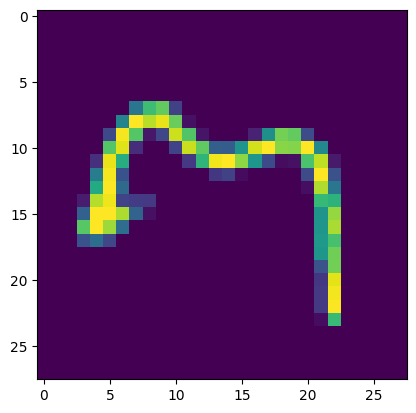

In [114]:
print(df_train_y[100])
plt.imshow(df_train_x[100].reshape(28, 28))

the number of training examples = 48000
the number of classes = 10
Dimension of images = 28 x 28  
The number of occurences of each class in the dataset = {0: 4766, 1: 4812, 2: 4812, 3: 4767, 4: 4786, 5: 4816, 6: 4823, 7: 4839, 8: 4763, 9: 4816}  



C:\Users\Meriam\AppData\Local\Temp\ipykernel_15600\4254326748.py:15: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  plt.title('label: %i' % label )


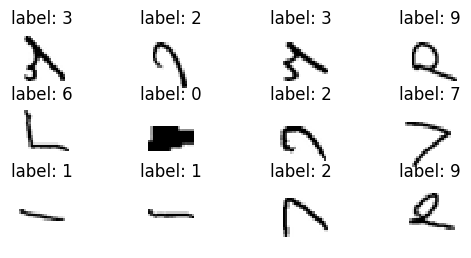

In [115]:
import matplotlib.pyplot as plt
print("the number of training examples = %i" % df_train_x.shape[0])
print("the number of classes = %i" % len(np.unique(df_train_y)))

print("Dimension of images = {:d} x {:d}  ".format(df_train_x[1].shape[0],df_train_x[1].shape[1])  )

#This line will allow us to know the number of occurrences of each specific class in the data
unique, count= np.unique(df_train_y, return_counts=True)
print("The number of occurences of each class in the dataset = %s " % dict (zip(unique, count) ), "\n" )
images_and_labels = list(zip(df_train_x,  df_train_y))
for index, (image, label) in enumerate(images_and_labels[:12]):
    plt.subplot(5, 4, index + 1)
    plt.axis('off')
    plt.imshow(image.squeeze(), cmap=plt.cm.gray_r, interpolation='nearest')
    plt.title('label: %i' % label )


    

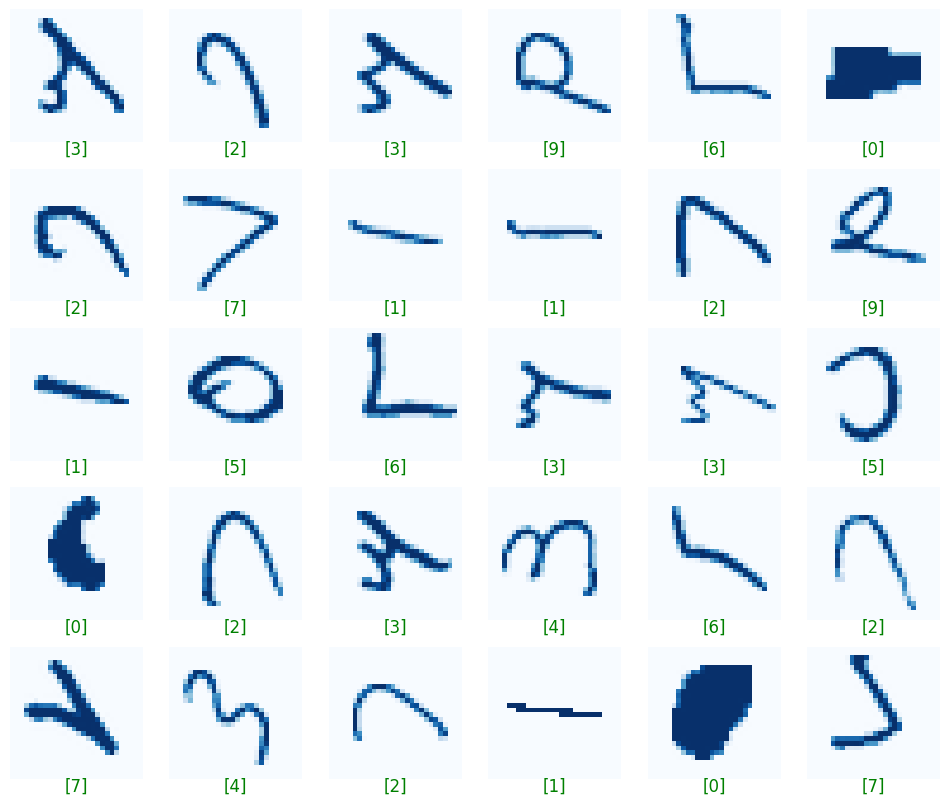

In [116]:
rows = 5 # defining no. of rows in figure
cols = 6 # defining no. of colums in figure

f = plt.figure(figsize=(2*cols,2*rows)) # defining a figure 

for i in range(rows*cols): 
    f.add_subplot(rows,cols,i+1) # adding sub plot to figure on each iteration
    plt.imshow(df_train_x[i].reshape([28,28]),cmap="Blues") 
    plt.axis("off")
    plt.title(str(df_train_y[i]), y=-0.15,color="green")
plt.savefig("digits.png")

In [117]:

X_train = pd.read_csv("C:\\Users\\Meriam\\OneDrive\\Document\\project\\Arabic-handwritten-digits-recognition-using-CNN\\Train images\\ai\\dataset\\csvTrainImages 60k x 784.csv", header=None)

y_train = pd.read_csv("C:\\Users\\Meriam\\OneDrive\\Document\\project\\Arabic-handwritten-digits-recognition-using-CNN\\Train images\\ai\\dataset\\csvTrainLabel 60k x 1.csv", header = None)

# testing data
X_test = pd.read_csv("C:\\Users\\Meriam\\OneDrive\\Document\\project\\Arabic-handwritten-digits-recognition-using-CNN\\Train images\\ai\\dataset\\csvTestImages 10k x 784.csv", header = None)
y_test= pd.read_csv("C:\\Users\\Meriam\\OneDrive\\Document\\project\\Arabic-handwritten-digits-recognition-using-CNN\\Train images\\ai\\dataset\\csvTestLabel 10k x 1.csv", header = None)

In [118]:
# converting pixel values from 0-255 to range [0,1]
X_train = X_train/255
X_test = X_test/255


In [119]:
import numpy as np

# Assuming X_train and X_test are DataFrames
# Convert DataFrames to NumPy arrays
X_train_array = X_train.to_numpy()
X_test_array = X_test.to_numpy()

# Reshape NumPy arrays for images (height = 28px, width = 28px, channel = 1)
X_train_reshaped = X_train_array.reshape(-1, 28, 28, 1).astype('float32')
X_test_reshaped = X_test_array.reshape(-1, 28, 28, 1).astype('float32')



In [120]:
print("The number of occurences of each class in the dataset = %s " % dict (zip(unique, count) ), "\n" )


The number of occurences of each class in the dataset = {0: 4766, 1: 4812, 2: 4812, 3: 4767, 4: 4786, 5: 4816, 6: 4823, 7: 4839, 8: 4763, 9: 4816}  



In [121]:
from keras.utils import to_categorical 

y_train= to_categorical(y_train, num_classes=10)
y_test = to_categorical(y_test, num_classes = 10)

In [122]:
print(y_train.shape)
print(y_test.shape)

(60000, 10)
(10000, 10)


In [123]:
X_train, X_test, y_train, y_test = train_test_split(X_train, y_train, test_size = 0.2, random_state=40)


In [124]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import schedules, RMSprop
from tensorflow.keras.callbacks import ReduceLROnPlateau
import time

# Convert DataFrame to NumPy array
X_train_array = X_train.to_numpy()
X_test_array = X_test.to_numpy()

# Reshape NumPy arrays for images (height = 28px, width = 28px, channel = 1)
# Reshape NumPy arrays for images (height = 28px, width = 28px, channel = 1)
X_train_reshaped = X_train_array.reshape(-1, 28*28).astype('float32')
X_test_reshaped = X_test_array.reshape(-1, 28*28).astype('float32')

# Set the ANN model
model = Sequential()
model.add(Dense(512, activation='relu', input_shape=(28*28,)))
model.add(Dropout(0.5))
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))

# Define the RMSprop optimizer with learning rate schedule
initial_learning_rate = 0.001
lr_schedule = schedules.ExponentialDecay(
    initial_learning_rate=initial_learning_rate,
    decay_steps=10000,
    decay_rate=0.9,
    staircase=True)

optimizer = RMSprop(learning_rate=lr_schedule, rho=0.9, epsilon=1e-08)

# Compile the model
model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])


# Set a learning rate annealer
learning_rate_reduction = ReduceLROnPlateau(monitor='val_accuracy', patience=3, verbose=1, factor=0.5, min_lr=0.00001)

epochs = 10
batch_size = 50

start = time.time()

# Fit the model
history = model.fit(X_train_reshaped, y_train, batch_size=batch_size, epochs=epochs,
                    validation_data=(X_test_reshaped, y_test), verbose=2, 
                    callbacks=[learning_rate_reduction])

# Predict the values from the validation dataset
y_pred_ann = model.predict(X_test_reshaped)

end = time.time()
print("Completion time cost:", end - start, "seconds.")
ann_time = end - start
model.save('modeel.h5')


Epoch 1/10
960/960 - 10s - loss: 0.2013 - accuracy: 0.9450 - val_loss: 0.0815 - val_accuracy: 0.9794 - lr: 0.0010 - 10s/epoch - 11ms/step
Epoch 2/10
960/960 - 8s - loss: 0.1008 - accuracy: 0.9763 - val_loss: 0.0720 - val_accuracy: 0.9827 - lr: 0.0010 - 8s/epoch - 8ms/step
Epoch 3/10
960/960 - 7s - loss: 0.0844 - accuracy: 0.9803 - val_loss: 0.0546 - val_accuracy: 0.9869 - lr: 0.0010 - 7s/epoch - 7ms/step
Epoch 4/10
960/960 - 7s - loss: 0.0769 - accuracy: 0.9832 - val_loss: 0.0676 - val_accuracy: 0.9863 - lr: 0.0010 - 7s/epoch - 7ms/step
Epoch 5/10
960/960 - 8s - loss: 0.0738 - accuracy: 0.9842 - val_loss: 0.0626 - val_accuracy: 0.9872 - lr: 0.0010 - 8s/epoch - 8ms/step
Epoch 6/10
960/960 - 9s - loss: 0.0699 - accuracy: 0.9852 - val_loss: 0.0543 - val_accuracy: 0.9899 - lr: 0.0010 - 9s/epoch - 9ms/step
Epoch 7/10
960/960 - 9s - loss: 0.0668 - accuracy: 0.9859 - val_loss: 0.0669 - val_accuracy: 0.9888 - lr: 0.0010 - 9s/epoch - 9ms/step
Epoch 8/10
960/960 - 9s - loss: 0.0635 - accuracy: 0

c:\Users\Meriam\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [125]:
history.history['loss']

[0.20133714377880096,
 0.10075607150793076,
 0.08441881090402603,
 0.07691364735364914,
 0.07380961626768112,
 0.06991235911846161,
 0.06683478504419327,
 0.06349203735589981,
 0.05933051183819771,
 0.06003862991929054]

In [126]:
history.history['val_loss']


[0.08150576800107956,
 0.07204525917768478,
 0.054629385471343994,
 0.06758018583059311,
 0.06264501810073853,
 0.05425175651907921,
 0.0669093132019043,
 0.05568397045135498,
 0.06608639657497406,
 0.05719764158129692]

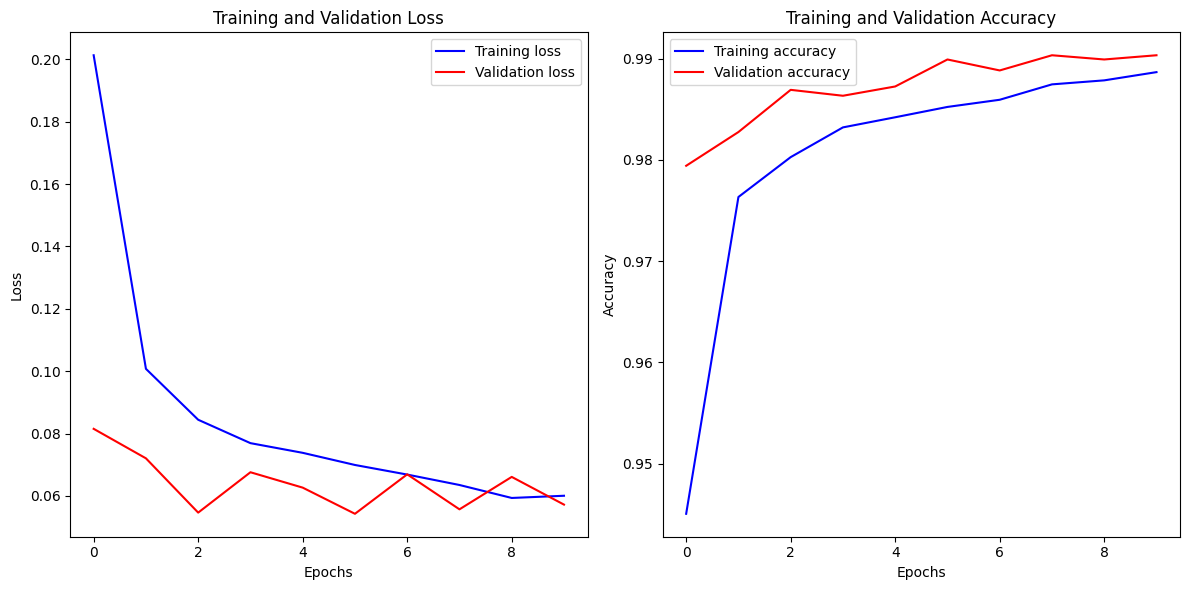

In [127]:
import matplotlib.pyplot as plt

# Plotting loss curves
plt.figure(figsize=(12, 6))

# Plot training loss vs validation loss
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], color='blue', label='Training loss')
plt.plot(history.history['val_loss'], color='red', label='Validation loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

# Plotting accuracy curves
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], color='blue', label='Training accuracy')
plt.plot(history.history['val_accuracy'], color='red', label='Validation accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()


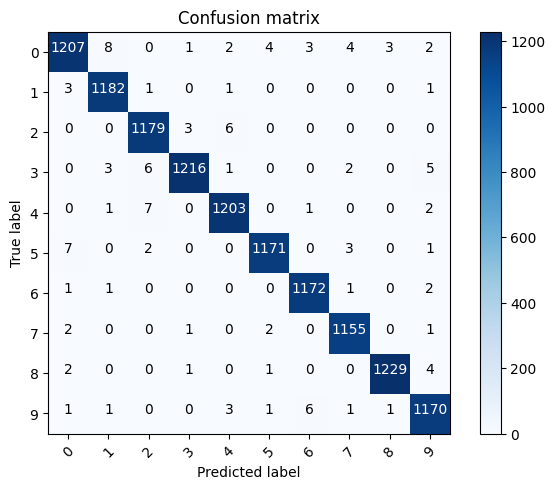

In [128]:
import itertools
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

def plot_confusion_matrix(cm, classes, normalize=False, title='Confusion matrix', cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], '.2f' if normalize else 'd'),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

# Convert predictions classes to one-hot encoded vectors
Y_pred_classes = np.argmax(y_pred_ann, axis=1)
# Convert validation observations to one-hot encoded vectors
Y_true = np.argmax(y_test, axis=1)
# Compute the confusion matrix
confusion_mtx = confusion_matrix(Y_true, Y_pred_classes)
# Plot the confusion matrix
plot_confusion_matrix(confusion_mtx, classes=range(10))
plt.show()


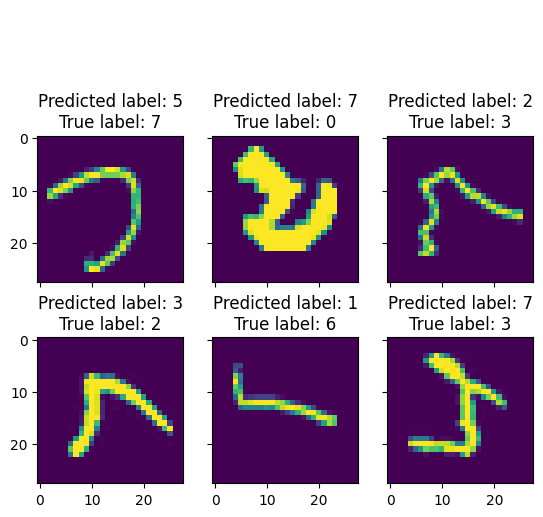

In [129]:
import matplotlib.pyplot as plt
import numpy as np

# Errors are differences between predicted labels and true labels
errors = (Y_pred_classes - Y_true != 0)

Y_pred_classes_errors = Y_pred_classes[errors]
Y_pred_errors = y_pred_ann[errors]
Y_true_errors = Y_true[errors]
X_val_errors = X_test[errors]

def display_errors(errors_index, img_errors, pred_errors, obs_errors):
    """ This function shows 6 images with their predicted and real labels"""
    n = 0
    nrows = 2
    ncols = 3
    fig, ax = plt.subplots(nrows, ncols, sharex=True, sharey=True)
    for row in range(nrows):
        for col in range(ncols):
            error = errors_index[n]
            img_errors_np = np.array(img_errors)  # Convert Pandas Series to NumPy array
            reshaped_img_errors = img_errors_np[error].reshape((28, 28))  # Reshape the array
            ax[row, col].imshow(reshaped_img_errors)
            ax[row, col].set_title("\n\n\n\nPredicted label: {}\nTrue label: {}".format(pred_errors[error], obs_errors[error]))
            n += 1

# Probabilities of the wrong predicted numbers
Y_pred_errors_prob = np.max(Y_pred_errors, axis=1)

# Predicted probabilities of the true values in the error set
true_prob_errors = np.diagonal(np.take(Y_pred_errors, Y_true_errors, axis=1))

# Difference between the probability of the predicted label and the true label
delta_pred_true_errors = Y_pred_errors_prob - true_prob_errors

# Sorted list of the delta prob errors
sorted_delta_errors = np.argsort(delta_pred_true_errors)

# Top 6 errors
most_important_errors = sorted_delta_errors[-6:]

# Show the top 6 errors
display_errors(most_important_errors, X_val_errors, Y_pred_classes_errors, Y_true_errors)
plt.show()


In [130]:
# Evaluate model
score = model.evaluate(X_test_reshaped, y_test, verbose=3)

print('Test accuracy: %2f%%' % (score[1] * 100))
# Print loss accuracy if needed
# print('Loss accuracy: %2f%%' % (score[0] * 100))
# Print model metrics names if needed
# print(model.metrics_names)
# Evaluate the model on the test set


Test accuracy: 99.033332%


In [131]:

import tkinter as tk
from tkinter import Canvas, Button, messagebox
from PIL import Image, ImageDraw, ImageTk
import numpy as np
from tensorflow.keras.models import load_model
import pandas as pd
import os

# Load the model
loaded_model = load_model('model.h5')

# File path for the CSV containing the image data
csv_file_path = "C:\\Users\\Meriam\\OneDrive\\Document\\project\\Arabic-handwritten-digits-recognition-using-CNN\\Train images\\ai\\dataset\\csvTestImages 10k x 784.csv"

# Read the CSV file containing the image paths
data = pd.read_csv(csv_file_path, header=None)  # Assuming there is no header in the CSV file

# Convert the data to a NumPy array
test_images = data.to_numpy()

current_image_index = 0

# Create a Tkinter window
root = tk.Tk()
root.title("Handwritten Digit Recognition")

# Function to recognize handwritten digit
def recognize_digit():
    global current_image_index

    if current_image_index < len(test_images):
        img_arr = test_images[current_image_index, :].reshape(28, 28).astype('float32') / 255.0
        
        # Predict digit using the model
        predictions = loaded_model.predict(img_arr.reshape(-1, 28 * 28))
        predicted_class = np.argmax(predictions)  # Get the index with the highest probability

        messagebox.showinfo("Predicted Digit", f"The predicted digit is: {predicted_class}")
    else:
        messagebox.showinfo("End of Images", "No more images to predict.")

def next_photo():
    global current_image_index
    current_image_index += 1
    if current_image_index < len(test_images):
        img_arr = test_images[current_image_index, :].reshape(28, 28).astype('float32') / 255.0
        img = Image.fromarray((img_arr * 255).astype('uint8'))
        img = img.resize((300, 300))  # Resize image to fit canvas
        photo = ImageTk.PhotoImage(img)
        canvas.create_image(0, 0, anchor=tk.NW, image=photo)
        canvas.image = photo  # Keep a reference to the image to avoid garbage collection
    else:
        messagebox.showinfo("End of Images", "No more images to display.")

# Create a canvas to display images
canvas = Canvas(root, width=300, height=300, bg='white')
canvas.pack()

# Buttons for recognizing digit and displaying next photo
recognize_button = Button(root, text="Recognize Digit", command=recognize_digit)
recognize_button.pack()

next_photo_button = Button(root, text="Next Photo", command=next_photo)
next_photo_button.pack()

# Display the first image initially
next_photo()

# Run the Tkinter main loop
root.mainloop()